In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler,LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import visualkeras
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import accuracy_score,average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

/home/constantjunior/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
"""L'import de la data"""
data = pd.read_csv('bcw_data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
"""Suppression des colonnes id et unnamed : 32"""
data=data.drop('Unnamed: 32', axis=1)
data=data.drop('id', axis=1)

# Analyse de la données

In [4]:
## Visualisation des informations concernant la dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
# Vérification des valeurs nulle
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
# Description statistique de la dataset
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Visualisation de la données

<AxesSubplot:>

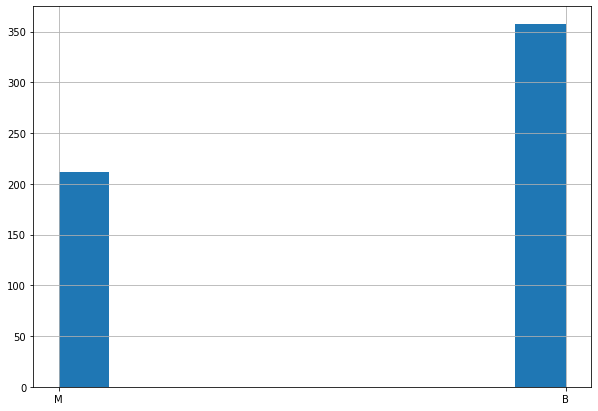

In [7]:
# Visualisation de la répartition d'échantillons par label
plt.figure(figsize=(10, 7))
data.diagnosis.hist() 

array([[<AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>],
       [<AxesSubplot:title={'center':'radius_se'}>,
        <AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>],
       [<AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'}>,
        <AxesSubplot:title={'center':'concav

<Figure size 1080x1224 with 0 Axes>

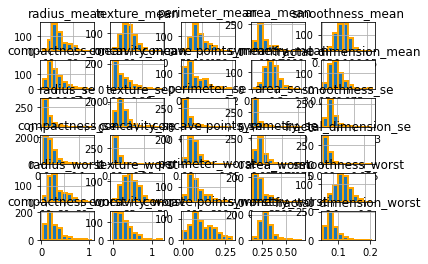

In [8]:
plt.figure(figsize=(15,17))
data.hist(edgecolor='orange', linewidth=2)

# Feature engineering

##  1. Normalisation des données

In [9]:
#Mise à l'échelle des Features est une étape essentielle dans la modélisation des algorithmes avec les ensembles de données.

scaler_data = StandardScaler()
data_standard= scaler_data.fit_transform(data.loc[ : , data.columns != 'diagnosis'])
print(data_standard)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


## 2. Encodage des labels

In [10]:
"""L'encodage est realisé sur la colonne diagnosis"""
encoder=LabelEncoder()
data['diagnosis_encod'] = encoder.fit_transform(data['diagnosis'])

In [11]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encod
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


<AxesSubplot:>

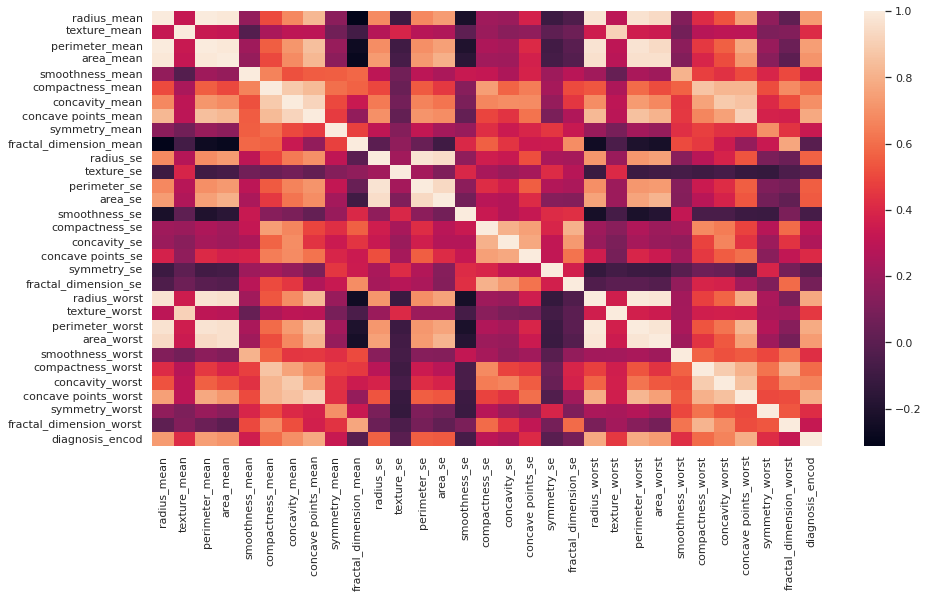

In [12]:
"""Utilisation d'une matrice de corrélation pour voir les corrélations entre features a la target"""

sn.set(rc = {'figure.figsize':(15,8)})
sn.heatmap(data.corr())

## Division de la dataset

In [13]:
""" Nous permet de diviser notre ensemble de données en sous-ensembles d'entrainement et de validation."""

x_train, x_val, y_train, y_val = train_test_split(data_standard, data['diagnosis_encod'], test_size = 0.20, shuffle = True)

# Construction des models

## Construction du model 1

In [14]:
"""Le modèle est composé de 4 couches dont une couche d'entrer, une couche de sortie et deux couches cachées
La couche d'entrée comporte 30 neurones comme le nombre des features a l'entrée, cela permet de donner à chaque neurone un feature,
avec une fonction d'activation relu.
La couche de sortie a un seul neurone, et une fonction d'activation sigmoid. Les couches intermédiaires sont composé de 25 et 15 neurones  et de fonction d'activation relue
"""
model = Sequential()
model.add(Dense(30, activation='relu', input_dim=30))
model.add(Dense(25, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
adam = Adam(learning_rate=0.2)
model.compile(loss="binary_crossentropy", optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 25)                775       
                                                                 
 dense_2 (Dense)             (None, 15)                390       
                                                                 
 dense_3 (Dense)             (None, 1)                 16        
                                                                 
Total params: 2,111
Trainable params: 2,111
Non-trainable params: 0
_________________________________________________________________


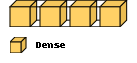

In [15]:
# Visualisation du model sous forme de graphe en utilisant VisualKeras
visualkeras.layered_view(model, legend=True,)

In [16]:
# Entrainement du premier model avec du batch_size 40, validation_split 0.1, epoch=20
history= model.fit(x_train, y_train, batch_size= 40, validation_split = 0.1, epochs= 20)

Epoch 1/20
11/11 [==============================] - 2s 66ms/step - loss: 9.1800 - accuracy: 0.7628 - val_loss: 1.4084 - val_accuracy: 0.9348
Epoch 2/20
11/11 [==============================] - 0s 8ms/step - loss: 0.6237 - accuracy: 0.9095 - val_loss: 4.3252 - val_accuracy: 0.9565
Epoch 3/20
11/11 [==============================] - 0s 7ms/step - loss: 2.1673 - accuracy: 0.9315 - val_loss: 9.8735 - val_accuracy: 0.9130
Epoch 4/20
11/11 [==============================] - 0s 7ms/step - loss: 3.8365 - accuracy: 0.9487 - val_loss: 8.1930 - val_accuracy: 0.9348
Epoch 5/20
11/11 [==============================] - 0s 7ms/step - loss: 1.2032 - accuracy: 0.9609 - val_loss: 3.3440 - val_accuracy: 0.9565
Epoch 6/20
11/11 [==============================] - 0s 6ms/step - loss: 0.3249 - accuracy: 0.9658 - val_loss: 2.7816 - val_accuracy: 0.9348
Epoch 7/20
11/11 [==============================] - 0s 7ms/step - loss: 0.2470 - accuracy: 0.9609 - val_loss: 5.3214 - val_accuracy: 0.9565
Epoch 8/20
11/11 [=

### Visualisation des performances de l'entrainement

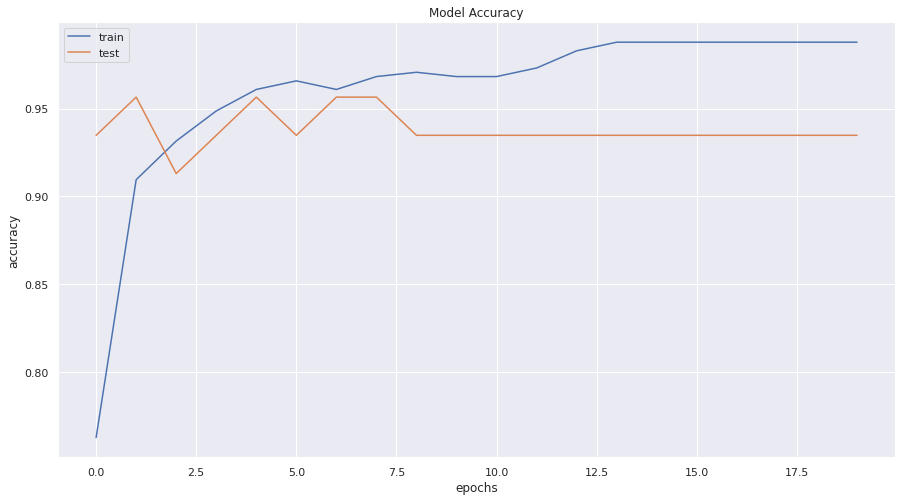

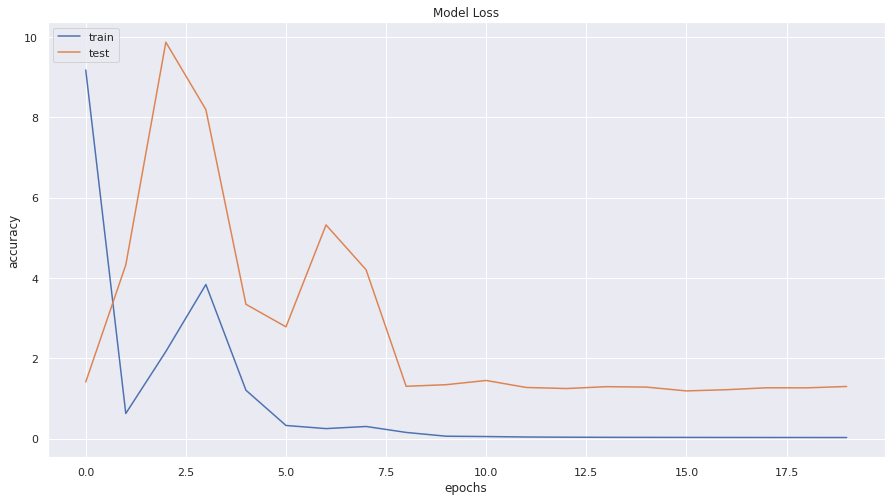

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [18]:
pred = model.predict(x_val) 
prediction = []
for i in range (len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

## Performance Model 1

In [19]:
# Evalution du modele avec  model.evaluate
model_evaluate = model.evaluate(x_val, y_val, verbose=0)
print(model_evaluate)

[0.29281994700431824, 0.9473684430122375]


In [20]:
# Evalution du model avec accuracy_score
accuracy = accuracy_score(y_val, list(prediction))
print(accuracy)

0.9473684210526315


In [21]:
# La classification report 
print(classification_report(y_val, list(prediction)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96        64
           1       1.00      0.88      0.94        50

    accuracy                           0.95       114
   macro avg       0.96      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



<AxesSubplot:>

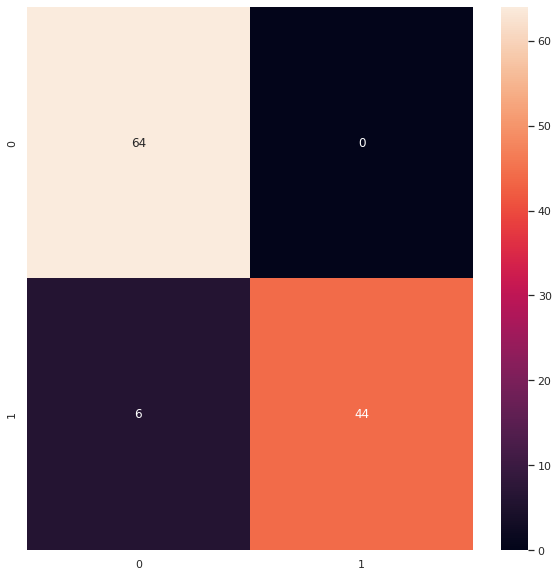

In [22]:
# Matrice de confusion
cm = confusion_matrix(list(y_val), prediction)
plt.figure(figsize=(10,10))
sn.heatmap(cm, annot = True)

## Construction du model 2 

In [23]:
# Le deuxieme model est construt en ajoutant des couches de dropout permettant d'eviter l'overfiting

model2 = Sequential()
model2.add(Dense(30, activation='relu', input_dim=30))
model2.add(Dropout(0.2))
model2.add(Dense(25, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))
adam = Adam(learning_rate=0.2)
model2.compile(loss="binary_crossentropy", optimizer=adam, metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                930       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_5 (Dense)             (None, 25)                775       
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1,731
Trainable params: 1,731
Non-trainable params: 0
_________________________________________________________________


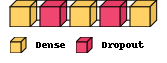

In [24]:
visualkeras.layered_view(model2, legend=True,)

In [25]:
history2= model2.fit(x_train, y_train, batch_size= 40, validation_split = 0.1, epochs= 15)

Epoch 1/15
11/11 [==============================] - 1s 29ms/step - loss: 1.0474 - accuracy: 0.9071 - val_loss: 0.5266 - val_accuracy: 0.9130
Epoch 2/15
11/11 [==============================] - 0s 6ms/step - loss: 1.1582 - accuracy: 0.9511 - val_loss: 5.0757 - val_accuracy: 0.9348
Epoch 3/15
11/11 [==============================] - 0s 6ms/step - loss: 0.6550 - accuracy: 0.9707 - val_loss: 4.3762 - val_accuracy: 0.9565
Epoch 4/15
11/11 [==============================] - 0s 7ms/step - loss: 0.6385 - accuracy: 0.9707 - val_loss: 2.0758 - val_accuracy: 0.9783
Epoch 5/15
11/11 [==============================] - 0s 6ms/step - loss: 0.2735 - accuracy: 0.9658 - val_loss: 1.0668 - val_accuracy: 0.9565
Epoch 6/15
11/11 [==============================] - 0s 5ms/step - loss: 0.1260 - accuracy: 0.9682 - val_loss: 0.7095 - val_accuracy: 0.9565
Epoch 7/15
11/11 [==============================] - 0s 5ms/step - loss: 0.0961 - accuracy: 0.9707 - val_loss: 0.6975 - val_accuracy: 0.9565
Epoch 8/15
11/11 [=

### Visualisation des performances de l'entrainement

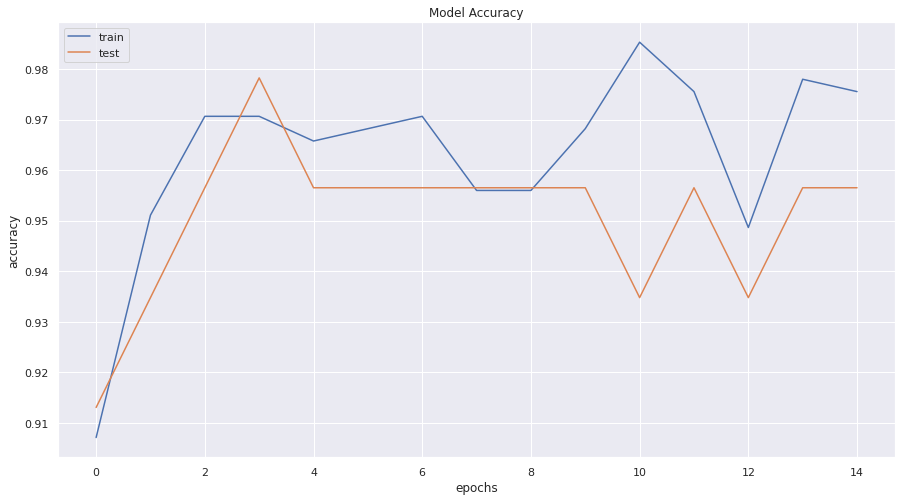

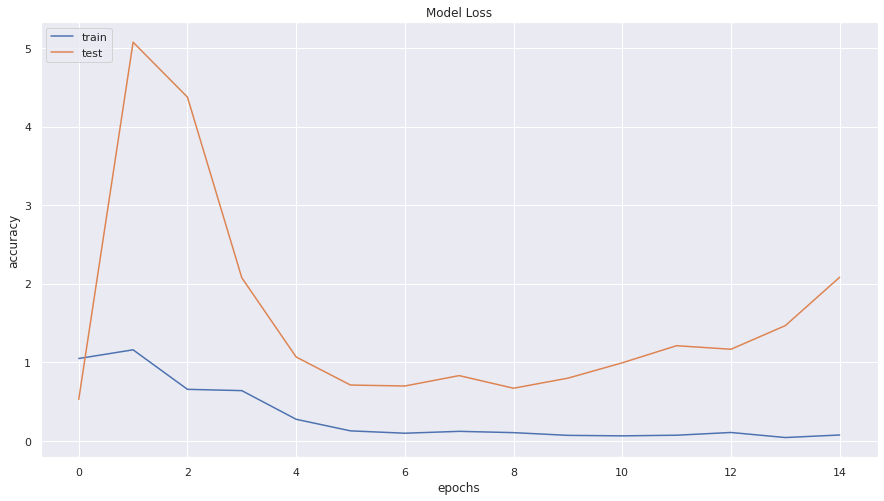

In [26]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [27]:
pred2 = model2.predict(x_val) 
prediction2 = []
for i in range (len(pred2)):
    if pred2[i].item() > 0.5:
        prediction2.append(1)
    else:
        prediction2.append(0)

## Performance du model 2

In [28]:
# La fonction accuracy_score calcule la précision du sous-ensemble
accuracy2 = accuracy_score(y_val, list(prediction2))
print(accuracy2)

0.9736842105263158


In [29]:
print(classification_report(y_val, list(prediction2)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        64
           1       1.00      0.94      0.97        50

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



<AxesSubplot:>

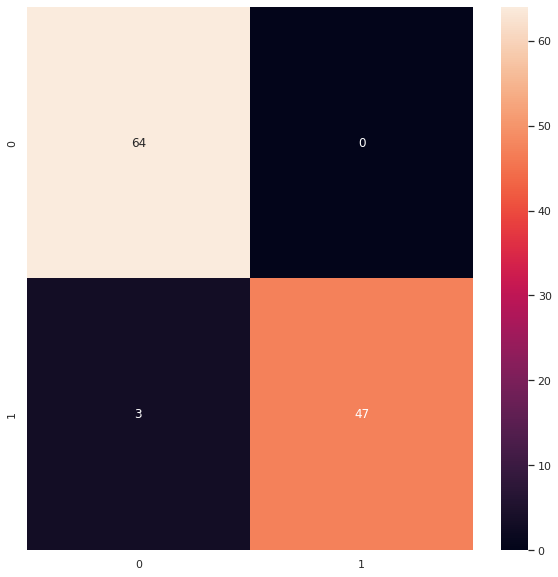

In [30]:

cm = confusion_matrix(list(y_val), prediction2)
plt.figure(figsize=(10,10))
sn.heatmap(cm, annot = True)